### Import the required libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


## Load the Dataset:


In [2]:
data = pd.read_csv('dry-beans.csv')

In [3]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
data.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


### Data Cleaning

In [5]:
data.isnull().sum()


Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

#### There's no null values

### Exploratory Data Analysis (EDA):


In [6]:
# Display the first few rows of the dataset
data.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [7]:

# Check the information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [8]:
# Calculate summary statistics
data.describe()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


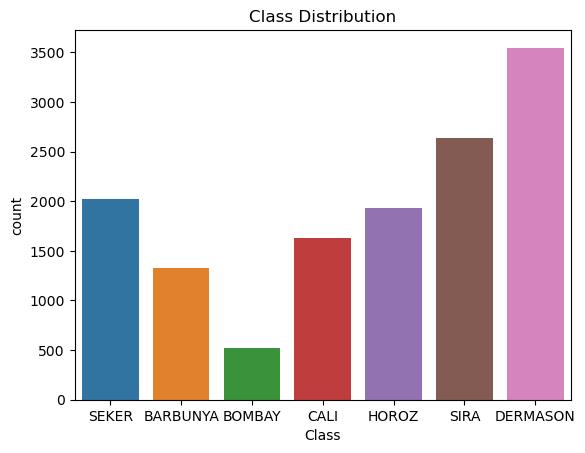

In [9]:

# Visualize the class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()


### Data Preprocessing:


In [10]:
# Split the data into X (features) and y (target variable)
X = data.drop('Class', axis=1)
y = data['Class']


In [11]:

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Training and Evaluation:


### Logistic Regression:


In [12]:
# Initialize and fit the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\Asad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)


In [14]:

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)


In [15]:

print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Report:")
print(report_lr)


Logistic Regression Accuracy: 0.6955563716489166
Logistic Regression Report:
              precision    recall  f1-score   support

    BARBUNYA       0.58      0.47      0.52       261
      BOMBAY       0.99      0.99      0.99       117
        CALI       0.70      0.76      0.73       317
    DERMASON       0.79      0.83      0.81       671
       HOROZ       0.62      0.70      0.66       408
       SEKER       0.74      0.54      0.62       413
        SIRA       0.59      0.65      0.62       536

    accuracy                           0.70      2723
   macro avg       0.72      0.71      0.71      2723
weighted avg       0.70      0.70      0.69      2723



### Decision Tree:


In [16]:
# Initialize and fit the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [17]:

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)


In [18]:

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)


In [19]:

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Report:")
print(report_dt)


Decision Tree Accuracy: 0.8909291222915902
Decision Tree Report:
              precision    recall  f1-score   support

    BARBUNYA       0.85      0.87      0.86       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.89      0.90      0.89       317
    DERMASON       0.88      0.89      0.88       671
       HOROZ       0.94      0.93      0.94       408
       SEKER       0.94      0.92      0.93       413
        SIRA       0.83      0.83      0.83       536

    accuracy                           0.89      2723
   macro avg       0.90      0.90      0.90      2723
weighted avg       0.89      0.89      0.89      2723



### k-Nearest Neighbors (kNN):


In [20]:
# Initialize and fit the kNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [21]:

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)


In [22]:

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)


In [23]:

print("kNN Accuracy:", accuracy_knn)
print("kNN Report:")
print(report_knn)


kNN Accuracy: 0.7194271024605214
kNN Report:
              precision    recall  f1-score   support

    BARBUNYA       0.45      0.45      0.45       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.61      0.64      0.62       317
    DERMASON       0.78      0.89      0.83       671
       HOROZ       0.73      0.66      0.69       408
       SEKER       0.83      0.62      0.71       413
        SIRA       0.70      0.75      0.72       536

    accuracy                           0.72      2723
   macro avg       0.73      0.71      0.72      2723
weighted avg       0.72      0.72      0.72      2723



### Naïve Bayes:


In [24]:
# Initialize and fit the Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print("Naïve Bayes Accuracy:", accuracy_nb)
print("Naïve Bayes Report:")
print(report_nb)


Naïve Bayes Accuracy: 0.7579875137715755
Naïve Bayes Report:
              precision    recall  f1-score   support

    BARBUNYA       0.60      0.46      0.52       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.65      0.76      0.70       317
    DERMASON       0.83      0.83      0.83       671
       HOROZ       0.79      0.80      0.80       408
       SEKER       0.70      0.69      0.70       413
        SIRA       0.76      0.79      0.77       536

    accuracy                           0.76      2723
   macro avg       0.76      0.76      0.76      2723
weighted avg       0.76      0.76      0.76      2723



In [25]:

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)


In [26]:

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)


In [27]:

print("Naïve Bayes Accuracy:", accuracy_nb)
print("Naïve Bayes Report:")
print(report_nb)


Naïve Bayes Accuracy: 0.7579875137715755
Naïve Bayes Report:
              precision    recall  f1-score   support

    BARBUNYA       0.60      0.46      0.52       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.65      0.76      0.70       317
    DERMASON       0.83      0.83      0.83       671
       HOROZ       0.79      0.80      0.80       408
       SEKER       0.70      0.69      0.70       413
        SIRA       0.76      0.79      0.77       536

    accuracy                           0.76      2723
   macro avg       0.76      0.76      0.76      2723
weighted avg       0.76      0.76      0.76      2723



### Support Vector Machines (SVM):


In [28]:
# Initialize and fit the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

In [29]:

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)


In [30]:

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)


In [31]:

print("SVM Accuracy:", accuracy_svm)
print("SVM Report:")
print(report_svm)


SVM Accuracy: 0.6312890194638267
SVM Report:
              precision    recall  f1-score   support

    BARBUNYA       0.48      0.08      0.14       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.60      0.90      0.72       317
    DERMASON       0.74      0.83      0.78       671
       HOROZ       0.63      0.59      0.61       408
       SEKER       0.40      0.26      0.31       413
        SIRA       0.57      0.74      0.64       536

    accuracy                           0.63      2723
   macro avg       0.63      0.63      0.60      2723
weighted avg       0.61      0.63      0.60      2723



### Compare the Performances:


In [32]:
# Create a DataFrame to compare the accuracies of different models
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'kNN', 'Naïve Bayes', 'SVM'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_knn, accuracy_nb, accuracy_svm]
})

# Sort the DataFrame by accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

print(accuracy_df)


                 Model  Accuracy
1        Decision Tree  0.890929
3          Naïve Bayes  0.757988
2                  kNN  0.719427
0  Logistic Regression  0.695556
4                  SVM  0.631289


## CONCLUSION

##### In the above code, we first load the dataset and perform EDA to gain insights into the data. Then, we preprocess the data by splitting it into training and testing sets. After that, we train and evaluate different classification models, including Logistic Regression, Decision Tree, kNN, Naïve Bayes, and SVM. Finally, we compare the performances of these models based on their accuracies and display the results in a DataFrame